In [10]:
import os
import sys
sys.path.append(os.path.abspath(r"//Users/shyhhao/Documents/AML_Assignment/AMLSassignment19_-20_SN16067637/B2"))

import B2_landmarks as b2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


In [11]:
def get_data_B2():

    X_B2, y_B2 = b2.extract_features_labels()
    Y_B2 = np.array([y_B2, -(y_B2 - 1)]).T

    # Rescaling Data
    scaler = StandardScaler()
    temp_X_reshape = X_B2.reshape(len(X_B2), len(X_B2[0]) * len(X_B2[0][0]))
    temp_X_B2 = scaler.fit_transform(temp_X_reshape)

    tr_X_B2, te_X_B2, tr_Y_B2, te_Y_B2 = train_test_split(temp_X_B2, Y_B2, test_size=0.1, random_state=0)

#     print(tr_X_B2.shape)
#     print(te_X_B2.shape)
#     print(tr_Y_B2.shape)
#     print(te_Y_B2.shape)
    
    return tr_X_B2, tr_Y_B2, te_X_B2, te_Y_B2


In [12]:
def B2_SVM(training_images, training_labels, test_images, test_labels):
#     classifier = svm.SVC(kernel='linear', C = 0.05)
    tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100]},
                        {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C':[1, 10, 100]},
                        {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]}
                       ]
    classifier = GridSearchCV(svm.SVC(), tuned_parameters, n_jobs = -1)
#     lab_enc = preprocessing.LabelEncoder()
    classifier.fit(training_images, training_labels)
                                
#  SVM Accuracy
    acc_B2_train = classifier.best_score_

#  Choosing the best accuracy using GridSearchCV
    pred_B2 = classifier.best_estimator_.predict(test_images)
    acc_B2_test = accuracy_score(test_labels, pred_B2)
    
    print(classifier.best_estimator_)
    print()
    print(classifier.best_params_)
    
    return acc_B2_train, acc_B2_test, pred_B2
    

In [13]:
# Run B2 accuracy test(MAIN.py)
from datetime import datetime
start = datetime.now()
    
tr_X_B2, tr_Y_B2, te_X_B2, te_Y_B2= get_data_B2()
model_B2 = B2_SVM(tr_X_B2, list(zip(*tr_Y_B2))[0], te_X_B2, list(zip(*te_Y_B2))[0])
acc_B2_train, acc_B2_test, pred_B2 = model_B2
print('TB2:{},{}'.format(acc_B2_train, acc_B2_test))

print(datetime.now() - start)


/Users/shyhhao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shyhhao/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

{'C': 100, 'degree': 3, 'kernel': 'poly'}
TB2:0.48494711147274205,0.49878048780487805
0:17:15.595791


In [5]:
# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         train_sizes=np.linspace(.1, 1.0, 5)):
#     """
#     Generate a simple plot of the test and training learning curve.

#     Parameters
#     ----------
#     estimator : object type that implements the "fit" and "predict" methods
#         An object of that type which is cloned for each validation.

#     title : string
#         Title for the chart.

#     X : array-like, shape (n_samples, n_features)
#         Training vector, where n_samples is the number of samples and
#         n_features is the number of features.

#     y : array-like, shape (n_samples) or (n_samples, n_features), optional
#         Target relative to X for classification or regression;
#         None for unsupervised learning.

#     ylim : tuple, shape (ymin, ymax), optional
#         Defines minimum and maximum yvalues plotted.

#     cv : integer, cross-validation generator, optional
#         If an integer is passed, it is the number of folds (defaults to 3).
#         Specific cross-validation objects can be passed, see
#         sklearn.cross_validation module for the list of possible objects
#     """
    
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")

#     train_sizes, train_scores, test_scores, fit_times, _ = \
#         learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
#                        train_sizes=train_sizes,
#                        return_times=True)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)
    
#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
#                          train_scores_mean + train_scores_std, alpha=0.1,
#                          color="r")
#     axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1,
#                          color="g")
#     axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
#                  label="Training score")
#     axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
#                  label="Cross-validation score")
#     axes[0].legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt

In [14]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

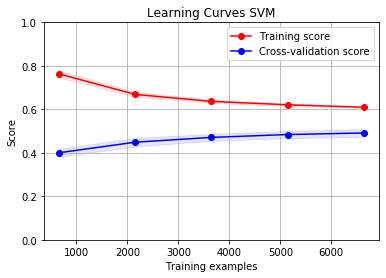

In [15]:
# Learning Curve
title = "Learning Curves SVM"

cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
# print(cv)
estimator = svm.SVC(kernel = 'poly', degree = 3, C = 100)
X, y = tr_X_B2, list(zip(*tr_Y_B2))[0]
# print(X)
plot_learning_curve(estimator, title, X, y, (0, 1.0), cv=cv, n_jobs=-1)

plt.show()

In [ ]:
plot_learning_curve(estimator, title, X, y, (0, 1.0), cv=cv, n_jobs=-1)

plt.show()

[[ 94  30  23  13   8]
 [ 48  64  20  36   8]
 [ 44  43  37  29   5]
 [ 19  29  22  88   7]
 [ 13   5   4   5 126]]


<function matplotlib.pyplot.show(*args, **kw)>

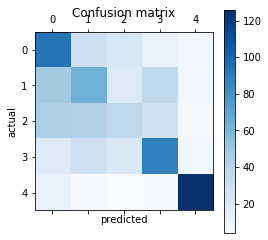

In [25]:
test_label = list(zip(*te_Y_B2))[0]
cf = confusion_matrix(test_label, pred_B2)
print(cf)

cmap = plt.cm.Blues

plt.matshow(cf, cmap = cmap)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show

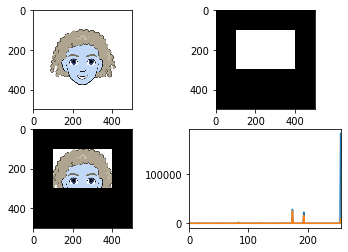

In [14]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/Users/shyhhao/Documents/AML_Assignment/AMLSassignment19_-20_SN16067637/B2/eye_color.dat')

basedir = '/Users/shyhhao/Documents/AML_Assignment/AMLSassignment19_-20_SN16067637/dataset_AMLS_19-20/dataset_AMLS_19-20/cartoon_set'
images_dir = os.path.join(basedir, 'img')
ex_img_path = os.path.join(images_dir, '4.png')
img = cv2.imread(ex_img_path)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

## Testing certain parts of the code

In [ ]:
def gdb1(): 
    X_B1, y_B1 = b1.extract_features_labels()

    return X_B1, y_B1

x, y = gdb1()

In [ ]:
def gdb2(x, y):
    X_B1 = x
    Y_B1 = y
    print(len(X_B1))
    print(len(Y_B1))
#     Y_B1 = np.array([y_B1, -(y_B1 - 1)]).T
    
#     # Rescaling Data
#     scaler = StandardScaler()
#     temp_X_reshape = X_B1.reshape(len(X_B1), len(X_B1[0]) * len(X_B1[0][0]))
#     temp_X_B1 = scaler.fit_transform(temp_X_reshape)
    
#     tr_X_B1, te_X_B1, tr_Y_B1, te_Y_B1 = train_test_split(temp_X_B1, Y_B1, test_size=0.3, random_state=0)

#     print(tr_X_B1.shape)
#     print(te_X_B1.shape)
#     print(tr_Y_B1.shape)
#     print(te_Y_B1.shape)
    
#     return tr_X_B1, tr_Y_B1, te_X_B1, te_Y_B1

In [ ]:
gdb2(x, y)

### Moving on to CNN as SVM produces very low accuracy and lots of image pre-processing functions to do before running through SVM

#### Importing the relevant libraries for CNN

In [101]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import pandas as pd
from sklearn import svm
from keras.preprocessing.image import ImageDataGenerator

srcdir = '/Users/shyhhao/Documents/AMLSassignment19_-20_LSH_SN16067637/AMLS_19-20_LSH_SN16067637/dataset_AMLS_19-20/dataset_AMLS_19-20/cartoon_set/img'

### Importing data, setting dataframe and append color to relative numbers

In [103]:
df = pd.read_csv("/Users/shyhhao/Documents/AMLSassignment19_-20_LSH_SN16067637/AMLS_19-20_LSH_SN16067637/dataset_AMLS_19-20/dataset_AMLS_19-20/cartoon_set/labels.csv")
df = pd.DataFrame(df).reset_index()
df.columns = ['Index', 'Total']
del df['Index']
df['eye_color'] = df['Total'].str.split('\t').str[1]
df['face_shape'] = df['Total'].str.split('\t').str[2]
df['img_name'] = df['Total'].str.split('\t').str[3]
del df['Total']
del df['face_shape']
df

eyescolor = []
for i in range(len(df.eye_color)):
    if df.eye_color.loc[i] == '0':
        eyescolor.append('brown')
    elif df.eye_color.loc[i] == '1':
        eyescolor.append('blue')
    elif df.eye_color.loc[i] == '2':
        eyescolor.append('green')
    elif df.eye_color.loc[i] == '3':
        eyescolor.append('gray')
    elif df.eye_color.loc[i] == '4':
        eyescolor.append('black')
df['colors'] = eyescolor
df

,eye_color,img_name,colors
0,1,0.png,blue
1,2,1.png,green
2,2,2.png,green
3,2,3.png,green
4,0,4.png,brown
...,...,...,...
9995,3,9995.png,gray
9996,0,9996.png,brown
9997,1,9997.png,blue
9998,0,9998.png,brown


### Splitting data

In [104]:
train, test = train_test_split(df, test_size = 0.2, random_state = 0)
print(len(train))
print(len(test))

8000
2000


### Generating training and validation data

In [105]:
xcol = 'img_name'
ycol = 'colors'

print('Receiving data..')
data = ImageDataGenerator(rescale = 1./255.,
                          validation_split = 0.25,
                          horizontal_flip = True,
                          vertical_flip = True
                         )

print('Arranging training dataset..')
train_gen = data.flow_from_dataframe(dataframe = train,
                                     directory = srcdir,
                                     x_col = xcol,
                                     y_col = ycol,
                                     class_mode = 'categorical',
                                     target_size = (64,64),
                                     batch_size = 32,
                                     subset = 'training'
                                    )

print('Arranging validation dataset..')
val_gen = data.flow_from_dataframe(dataframe = train,
                                   directory = srcdir,
                                   x_col = xcol,
                                   y_col = ycol,
                                   class_mode = 'categorical',
                                   target_size = (64,64),
                                   batch_size = 32,
                                   subset = 'validation'
                                  )

Receiving data..
Arranging training dataset..
Found 6000 validated image filenames belonging to 5 classes.
Arranging validation dataset..
Found 2000 validated image filenames belonging to 5 classes.


### Convolutional Neural Network - Setting layers of matrix

In [111]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(24, (3,3), input_shape=train_gen.image_shape))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(24, (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(48, (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(96, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(5))
model.add(Activation("softmax"))

opt = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 24)        672       
_________________________________________________________________
activation_19 (Activation)   (None, 62, 62, 24)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 24)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 24)        5208      
_________________________________________________________________
activation_20 (Activation)   (None, 29, 29, 24)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 27, 27, 48)        10416     
_________________________________________________________________
activation_21 (Activation)   (None, 27, 27, 48)        0         
__________

### Training data on CNN and calibrating epoch

In [112]:
from datetime import datetime
start = datetime.now()
cnn_training = model.fit_generator(train_gen, 
                                   steps_per_epoch = train_gen.samples // 32,
                                   validation_data = val_gen, 
                                   validation_steps = val_gen.samples // 32,
                                   epochs = 20
                                  )
print(datetime.now() - start)

Epoch 1/20
187/187 [==============================] - 38s 202ms/step - loss: 1.3551 - acc: 0.3840 - val_loss: 1.1554 - val_acc: 0.5274
Epoch 2/20
187/187 [==============================] - 36s 193ms/step - loss: 0.7691 - acc: 0.7228 - val_loss: 0.4790 - val_acc: 0.8227
Epoch 3/20
187/187 [==============================] - 36s 193ms/step - loss: 0.4490 - acc: 0.8197 - val_loss: 0.4100 - val_acc: 0.8389
Epoch 4/20
187/187 [==============================] - 36s 192ms/step - loss: 0.4100 - acc: 0.8237 - val_loss: 0.3977 - val_acc: 0.8222
Epoch 5/20
187/187 [==============================] - 36s 193ms/step - loss: 0.3715 - acc: 0.8391 - val_loss: 0.3696 - val_acc: 0.8481
Epoch 6/20
187/187 [==============================] - 36s 193ms/step - loss: 0.3636 - acc: 0.8416 - val_loss: 0.3338 - val_acc: 0.8476
Epoch 7/20
187/187 [==============================] - 36s 194ms/step - loss: 0.3518 - acc: 0.8478 - val_loss: 0.3437 - val_acc: 0.8404
Epoch 8/20
187/187 [==============================] - 3

### Plotting learning curve

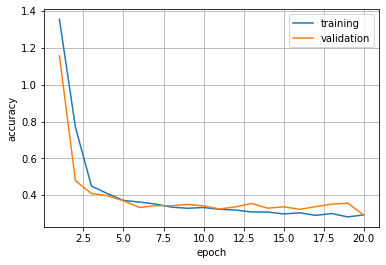

In [113]:
num_epochs = 20
epoch_nums = range(1,num_epochs+1)
training_acc = cnn_training.history["loss"]
validation_acc = cnn_training.history["val_loss"]
plt.plot(epoch_nums, training_acc)
plt.plot(epoch_nums, validation_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.grid()
plt.show()

### Plotting error graph

Generating predictions from validation data..


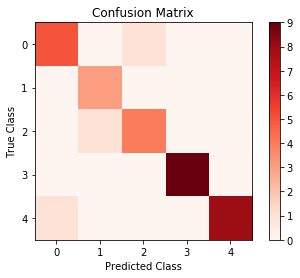

In [114]:
print("Generating predictions from validation data..")

x_test = val_gen[0][0]
y_test = val_gen[0][1]

class_probabilities = model.predict(x_test)

predictions = np.argmax(class_probabilities, axis=1)

true_labels = np.argmax(y_test, axis=1)

classes = ["Brown", "Blue", "Green", "Gray" , "Black"]

cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Reds)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### CNN model metrix evaluation

In [161]:
print("Preparing testing dataset..")
test_data = ImageDataGenerator(rescale=1./255)
test_gen = test_data.flow_from_dataframe(dataframe=test,
                                            directory=srcdir,
                                            x_col=xcol,
                                            y_col=ycol,
                                            class_mode="categorical",
                                            target_size = (64,64),
                                            batch_size=1,
                                            shuffle=False
                                           )

filenames = test_gen.filenames
nb_samples = len(filenames)

prob = model.predict_generator(test_gen,steps = nb_samples)

Preparing testing dataset..
Found 2000 validated image filenames belonging to 5 classes.


In [162]:
print(len(filenames))
print(len(prob))

2000
2000


In [163]:
pred = np.argmax(prob, axis=1)
true = np.array(test_gen.classes)
print(len(pred))

newcm = confusion_matrix(true, pred)

print(newcm)

2000
[[352  10   5  28   4]
 [ 25 357   4  24   5]
 [ 34  17 324  23  10]
 [ 26   7   4 349  10]
 [ 33  12   8  25 304]]


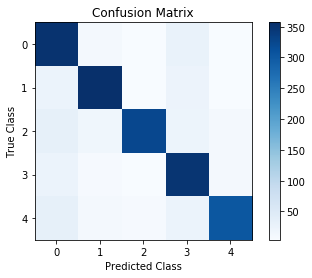

In [164]:
plt.imshow(newcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
# tick_marks = np.arange(len(classes))
plt.title('Confusion Matrix')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [165]:
acc = accuracy_score(true, pred)
rec = recall_score(true, pred, pos_label = 'positive', average ='macro') ## Weighted using macro
pre = precision_score(true,pred, pos_label = 'positive', average ='macro') ## Weighted using macro
f1 = f1_score(true,pred, pos_label = 'positive', average ='macro') ## Weighted using macro
print("Accuracy :" + str(acc))
print("Precision :" + str(pre))
print("Recall :" + str(rec))
print("F1 Score :" + str(f1))

Accuracy :0.843
Precision :0.8528236896184529
Recall :0.842737754867289
F1 Score :0.8439860280415671


## Testing on new dataset

In [166]:
newdir = '/Users/shyhhao/Documents/dataset_test_AMLS_19-20/cartoon_set_test/img'
df_new = pd.read_csv("/Users/shyhhao/Documents/dataset_test_AMLS_19-20/cartoon_set_test/labels.csv")
df_new = pd.DataFrame(df_new).reset_index()
df_new.columns = ['Index', 'Total']
del df_new['Index']
df_new['eye_color'] = df_new['Total'].str.split('\t').str[1]
df_new['face_shape'] = df_new['Total'].str.split('\t').str[2]
df_new['img_name'] = df_new['Total'].str.split('\t').str[3]
del df_new['Total']
del df_new['face_shape']
df_new

eyescolor = []
for i in range(len(df_new.eye_color)):
    if df_new.eye_color.loc[i] == '0':
        eyescolor.append('brown')
    elif df_new.eye_color.loc[i] == '1':
        eyescolor.append('blue')
    elif df_new.eye_color.loc[i] == '2':
        eyescolor.append('green')
    elif df_new.eye_color.loc[i] == '3':
        eyescolor.append('gray')
    elif df_new.eye_color.loc[i] == '4':
        eyescolor.append('black')
df_new['colors'] = eyescolor
df_new

,eye_color,img_name,colors
0,2,0.png,green
1,1,1.png,blue
2,0,2.png,brown
3,0,3.png,brown
4,3,4.png,gray
...,...,...,...
2495,4,2495.png,black
2496,2,2496.png,green
2497,2,2497.png,green
2498,4,2498.png,black


In [167]:
xcol = 'img_name'
ycol = 'colors'
test_newdata = ImageDataGenerator(rescale=1./255)
val_gen_new = test_newdata.flow_from_dataframe(dataframe = df_new,
                                       directory = newdir,
                                       x_col = xcol,
                                       y_col = ycol,
                                       class_mode = 'categorical',
                                       target_size = (64,64),
                                       batch_size = 1,
                                       shuffle = False
                                      )

Found 2500 validated image filenames belonging to 5 classes.


In [172]:
new_filenames = val_gen_new.filenames
nb_samples = len(new_filenames)

new_prob = model.predict_generator(val_gen_new,steps = nb_samples)

In [173]:
print(len(new_filenames), len(new_prob))

2500 2500


In [174]:
new_pred = np.argmax(new_prob, axis=1)
new_true = np.array(val_gen_new.classes)
print(len(new_pred))

newcm = confusion_matrix(new_true, new_pred)

print(newcm)

2500
[[423   9   7  27   6]
 [ 34 397   9  40   3]
 [ 44   7 403  45   7]
 [ 46  12   5 442   9]
 [ 30  16  10  37 432]]


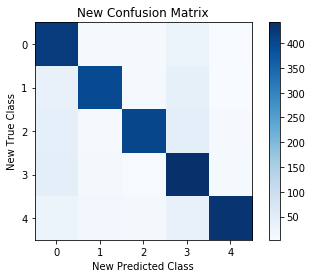

In [177]:
plt.imshow(newcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
# tick_marks = np.arange(len(classes))
plt.title('New Confusion Matrix')
plt.xlabel("New Predicted Class")
plt.ylabel("New True Class")
plt.show()

In [178]:
acc = accuracy_score(new_true, new_pred)
rec = recall_score(new_true, new_pred, pos_label = 'positive', average ='macro') ## Weighted using macro
pre = precision_score(new_true,new_pred, pos_label = 'positive', average ='macro') ## Weighted using macro
f1 = f1_score(new_true,new_pred, pos_label = 'positive', average ='macro') ## Weighted using macro
print("Accuracy :" + str(acc))
print("Precision :" + str(pre))
print("Recall :" + str(rec))
print("F1 Score :" + str(f1))

Accuracy :0.8388
Precision :0.8510161569132638
Recall :0.8394709240085456
F1 Score :0.8406147198368226
